#Walmart Store Sales Forecasting

## Imoprting packages 

Important packages needed to be imported before doing further analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Importing, merging and cleaning the data sets 

### importinng

In [65]:
train = pd.read_csv("/content/train.csv.zip")
test = pd.read_csv("/content/test.csv.zip")
features = pd.read_csv("/content/features.csv.zip")
stores = pd.read_csv("/content/stores.csv")
sa_submission = pd.read_csv("/content/sampleSubmission.csv.zip")

In [66]:
print(train.head())
print("\n\n")
print(test.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False



   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False


In [67]:
print(features.head())
print("\n\n")
print(stores.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  



   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   

In [68]:
print(train.info())
print("\n\n")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None


In [69]:
print(features.info())
print("\n\n")
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 


### merging

In [70]:
featureStore = features.merge(stores, 
                              how='inner', 
                              on = "Store")

Changing the Date column to Data time object.

In [71]:
featureStore['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [8]:
# train = train.merge(featureStore, 
#                     how='inner', 
#                     on=['Store','Date','IsHoliday'])

In [9]:
# test = test.merge(featureStore, 
#                   how='inner',
#                   on=['Store','Date','IsHoliday'])

In [72]:
train_merge = pd.merge_asof(train, featureStore, on='Store',by='Date')
test_merge = pd.merge_asof(test, featureStore, on='Store',by='Date')

In [73]:
print(train_merge.head())
print("\n\n")
print(test_merge.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  1

In [97]:
#droping the dublicate of IsHoliday column
train_merge = train_merge.drop(columns=['IsHoliday_x'])
test_merge = test_merge.drop(columns=['IsHoliday_x'])

#renaming the IsHoliday_y column to IsHoliday
train_merge = train_merge.rename(columns={"IsHoliday_y": "IsHoliday"})
test_merge = test_merge.rename(columns={"IsHoliday_y": "IsHoliday"})

In [98]:
print(train_merge.info())
print("\n\n")
print(test_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Type          421570 non-null  object        
 15  Size          421

### cleaning



#### Cheacking for missing value

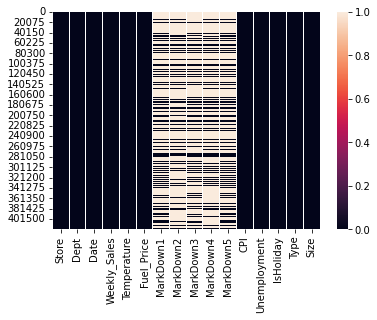

In [99]:
sns.heatmap(train_merge.isna())
plt.show()

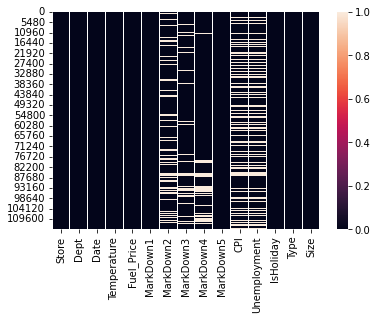

In [100]:
sns.heatmap(test_merge.isna())
plt.show()

In [101]:
train = train_merge.copy()
test = test_merge.copy()

In [103]:
features_drop=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_clean=train.drop(features_drop, axis=1)
test_clean=test.drop(features_drop, axis=1)

In [104]:
test_clean.isna().sum()

Store               0
Dept                0
Date                0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
IsHoliday           0
Type                0
Size                0
dtype: int64

In [105]:
train_clean.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

filling missing values with zero. 

In [106]:
test_clean = test_clean.fillna(0)

In [107]:
test_clean.isna().sum()

Store           0
Dept            0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

## Feature engineering

In [108]:
#The week ordinal of the year.
train_clean['Week'] = train_clean['Date'].dt.week
test_clean['Week'] = test_clean['Date'].dt.week

#The day of the week with Monday=0, Sunday=6.
train_clean['Day_of_week'] =train_clean['Date'].dt.dayofweek
test_clean['Day_of_week'] =test_clean['Date'].dt.dayofweek

#The month as January=1, December=12.
train_clean['Month'] =train_clean['Date'].dt.month 
test_clean['Month'] =test_clean['Date'].dt.month 

#The year of the datetime.
train_clean['Year'] =train_clean['Date'].dt.year
test_clean['Year'] =test_clean['Date'].dt.year

#The days of the datetime.
train_clean['Day'] =train_clean['Date'].dt.day 
test_clean['Day'] =test_clean['Date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
train_clean.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Day_of_week,Month,Year,Day
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,5,4,2,2010,5
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,A,151315,6,4,2,2010,12
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,A,151315,7,4,2,2010,19
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,A,151315,8,4,2,2010,26
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,A,151315,9,4,3,2010,5


In [110]:
test_clean.head()

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Day_of_week,Month,Year,Day
0,1,1,2012-11-02,55.32,3.386,223.462779,6.573,False,A,151315,44,4,11,2012,2
1,1,1,2012-11-09,61.24,3.314,223.481307,6.573,False,A,151315,45,4,11,2012,9
2,1,1,2012-11-16,52.92,3.252,223.512911,6.573,False,A,151315,46,4,11,2012,16
3,1,1,2012-11-23,56.23,3.211,223.561947,6.573,True,A,151315,47,4,11,2012,23
4,1,1,2012-11-30,52.34,3.207,223.610984,6.573,False,A,151315,48,4,11,2012,30


## Exploratory data analysis

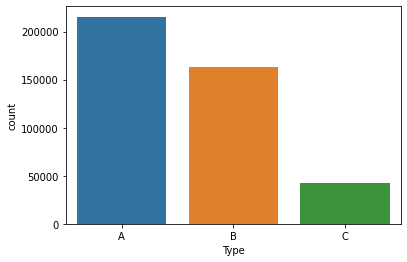

In [111]:
sns.countplot(x="Type", data=train_clean)
plt.show()

Most stores are of Type A.

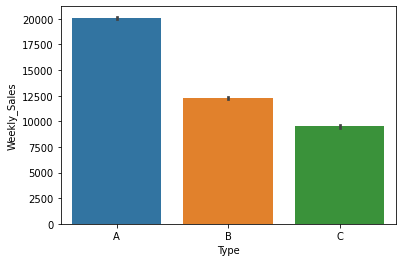

In [112]:
sns.barplot(x="Type", y="Weekly_Sales", data=train_clean)
plt.show()

Store Type A has the higest weekly sales over all

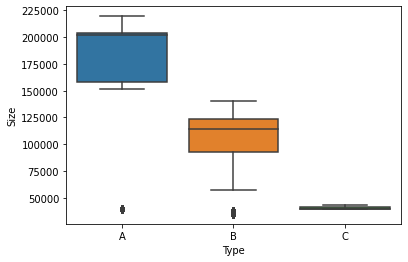

In [113]:
sns.boxplot(x='Type', y='Size', data=train_clean)
plt.show()

By boxplot, we can say that type A store is the largest store and C is the smallest

In [114]:
grp_data_year = train_clean.groupby("Year")["Weekly_Sales"].mean().reset_index()
print(grp_data_year.sort_values("Weekly_Sales",  ascending=False))

   Year  Weekly_Sales
0  2010  16270.275737
1  2011  15954.070675
2  2012  15694.948597


    Month  Weekly_Sales
11     12  19355.702141
10     11  17491.031424
5       6  16326.137002
7       8  16062.516933
1       2  16008.779217
6       7  15861.419650
4       5  15776.337202
3       4  15650.338357
2       3  15416.657597
9      10  15243.855576
8       9  15095.886154
0       1  14126.075111





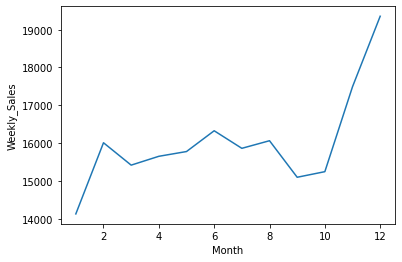

In [115]:
grp_data_month = train_clean.groupby("Month")["Weekly_Sales"].mean().reset_index()
print(grp_data_month.sort_values("Weekly_Sales", ascending=False))
print("\n\n")
sns.lineplot(data=grp_data_month, x="Month", y="Weekly_Sales")
plt.show()

    Week  Weekly_Sales
50    51  26396.399283
46    47  22220.944538
49    50  20413.010012
48    49  18668.667017
21    22  16779.736413





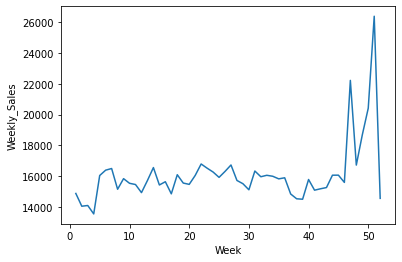

In [116]:
grp_data_week = train_clean.groupby("Week")["Weekly_Sales"].mean().reset_index()
print(grp_data_week.sort_values("Weekly_Sales", ascending=False).head())
print("\n\n")
sns.lineplot(data=grp_data_week, x="Week", y="Weekly_Sales")
plt.show()

We can see that on average sales was going down over the year. Last two momths of the years showed significantly high sales figure than other months of the year. Week 51, 47 and 50 had high sales compare to other weeks.

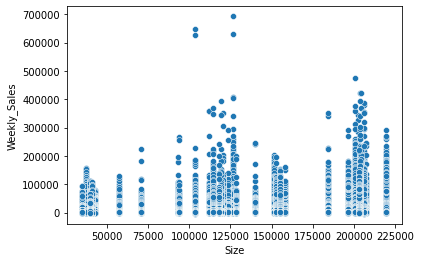

In [117]:
sns.scatterplot(data=train_clean, x="Size", y="Weekly_Sales")
plt.show()

In [119]:
train_cl = train_clean.copy()
test_cl = test_clean.copy()

## Modeling

### Preparing data for modelling

Changing IsHoliday and Type columns 

In [120]:
# df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')
train_cl['IsHoliday'] = train_cl['IsHoliday'].apply(lambda x: 0 if x == False else 1)
test_cl['IsHoliday'] = test_cl['IsHoliday'].apply(lambda x: 0 if x == False else 1)

In [121]:
train_cl["Type"] = train_cl["Type"].apply(lambda x: 1 if x == "A" else (2 if x == "B" else 3)) 
test_cl["Type"] = test_cl["Type"].apply(lambda x: 1 if x == "A" else (2 if x == "B" else 3)) 

In [122]:
train_cl.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Day_of_week,Month,Year,Day
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,0,1,151315,5,4,2,2010,5
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,1,1,151315,6,4,2,2010,12
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,0,1,151315,7,4,2,2010,19
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,0,1,151315,8,4,2,2010,26
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,0,1,151315,9,4,3,2010,5


In [123]:
test_cl.head()

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Day_of_week,Month,Year,Day
0,1,1,2012-11-02,55.32,3.386,223.462779,6.573,0,1,151315,44,4,11,2012,2
1,1,1,2012-11-09,61.24,3.314,223.481307,6.573,0,1,151315,45,4,11,2012,9
2,1,1,2012-11-16,52.92,3.252,223.512911,6.573,0,1,151315,46,4,11,2012,16
3,1,1,2012-11-23,56.23,3.211,223.561947,6.573,1,1,151315,47,4,11,2012,23
4,1,1,2012-11-30,52.34,3.207,223.610984,6.573,0,1,151315,48,4,11,2012,30


Visualizing Correlations

[]

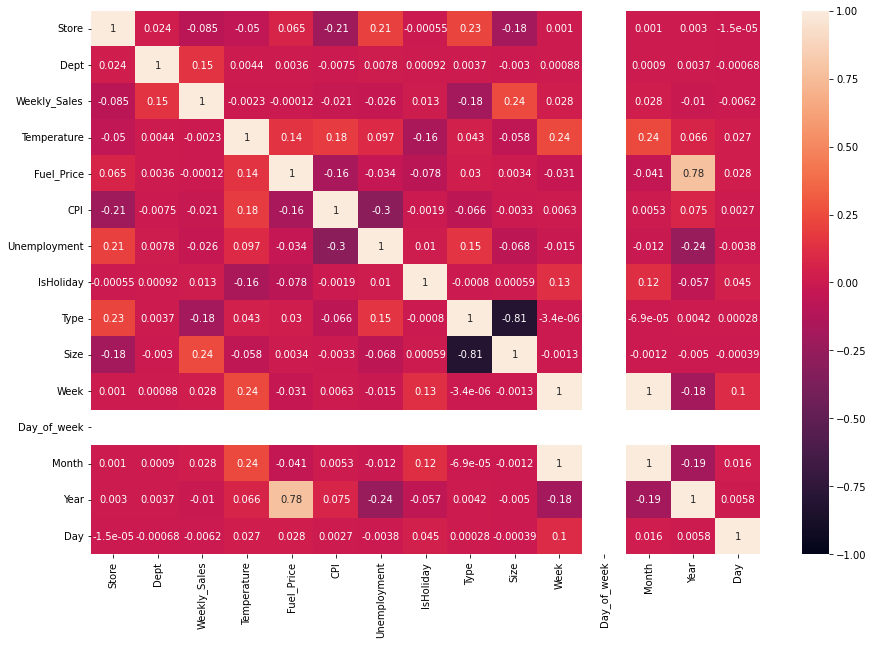

In [124]:
corr_train = train_cl.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_train, vmax = 1.0, annot=True, vmin=-1.0)
plt.plot()

Dropping irrelevant columns

In [125]:
features_drop=['Date','Day_of_week']
train_final=train_cl.drop(features_drop, axis=1)
test_final=test_cl.drop(features_drop, axis=1)

In [126]:
train_final.head(3)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Month,Year,Day
0,1,1,24924.50,42.31,2.572,211.096358,8.106,0,1,151315,5,2,2010,5
1,1,1,46039.49,38.51,2.548,211.242170,8.106,1,1,151315,6,2,2010,12
2,1,1,41595.55,39.93,2.514,211.289143,8.106,0,1,151315,7,2,2010,19


In [127]:
test_final.head(3)

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Month,Year,Day
0,1,1,55.32,3.386,223.462779,6.573,0,1,151315,44,11,2012,2
1,1,1,61.24,3.314,223.481307,6.573,0,1,151315,45,11,2012,9
2,1,1,52.92,3.252,223.512911,6.573,0,1,151315,46,11,2012,16


In [40]:
# https://github.com/ishritam/Walmart-Recruiting---Store-Sales-Forecasting/blob/master/Walmart_Original_Final.ipynb
# https://www.kaggle.com/code/gcdatkin/walmart-holiday-sale-prediction/notebook

### Test Train split

In [147]:
feature = ['Store', 'Dept', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday','Type', 'Size', 'Week', 'Month',
       'Year', 'Day']
X = train_final[feature]
y = train_final.Weekly_Sales

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### Modeling and Training

Decision Tree

In [149]:
dt_model = DecisionTreeRegressor()

In [150]:
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

In [151]:
dt_pred

array([ 2987.12,  1416.16, 17941.34, ...,  5738.88,  7908.33,    76.38])

In [152]:
dt_model.score(X_train,y_train)

1.0

In [153]:
dt_model.score(X_test,y_test)

0.9558909530721456

In [154]:
print('MAE:', metrics.mean_absolute_error(y_test,dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('R-sq:', metrics.r2_score(y_test, dt_pred))

MAE: 1765.2822720623703
MSE: 22782755.399349477
RMSE: 4773.128470861588
R-sq: 0.9558909530721456


Random Forrest

In [155]:
rf_model = RandomForestRegressor()

In [156]:
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

In [157]:
rf_pred

array([ 2919.4118,  1523.6714, 18507.054 , ...,  5400.9097,  6529.4547,
         390.1644])

In [158]:
rf_model.score(X_train,y_train)

0.9969122531752949

In [159]:
rf_model.score(X_test,y_test)

0.9757695509305727

In [160]:
print('MAE:', metrics.mean_absolute_error(y_test,rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R-sq:', metrics.r2_score(y_test, rf_pred))

MAE: 1329.1675903748685
MSE: 12515264.618346378
RMSE: 3537.691990316056
R-sq: 0.9757695509305727


Feature Importance

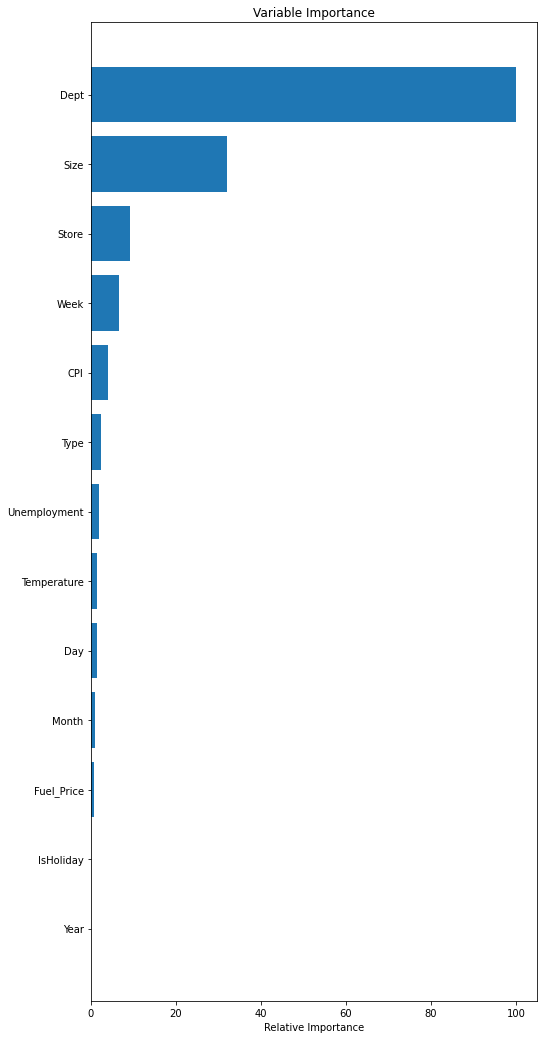

In [161]:
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
feature_importance = rf_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Prediction

In [162]:
final_pred = rf_model.predict(test_final)

In [163]:
test['Weekly_Sales']= final_pred

In [164]:
sa_submission['Weekly_Sales'] = test['Weekly_Sales']
sa_submission.to_csv('submission_1.csv',index=False)